In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
from scipy.special import gamma

from joblib import Parallel, delayed

import datetime


In [5]:
def get_hurst_exponent(time_series, max_lag=100):

    lags = range(2, max_lag)

    #   For every X we calculate X minus X_SHIFTED_Q. Then we calculate STD.
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # log()
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [2]:
input_data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')
input_data

,date,time,open,high,low,close
0,12/19/2011,9:30:00,1215.875,1216.375,1215.625,1215.875
1,12/19/2011,9:31:00,1215.875,1217.125,1215.875,1217.125
2,12/19/2011,9:32:00,1217.125,1217.875,1217.125,1217.625
3,12/19/2011,9:33:00,1217.625,1218.375,1217.625,1218.125
4,12/19/2011,9:34:00,1218.125,1218.375,1217.625,1217.875
...,...,...,...,...,...,...
390547,12/16/2015,16:10:00,2070.125,2070.375,2069.875,2070.125
390548,12/16/2015,16:11:00,2070.125,2070.875,2069.125,2069.250
390549,12/16/2015,16:12:00,2069.250,2072.125,2069.125,2072.125
390550,12/16/2015,16:13:00,2072.125,2072.625,2071.625,2072.000


In [3]:
data = input_data.close
data

0         1215.875
1         1217.125
2         1217.625
3         1218.125
4         1217.875
            ...   
390547    2070.125
390548    2069.250
390549    2072.125
390550    2072.000
390551    2072.125
Name: close, Length: 390552, dtype: float64

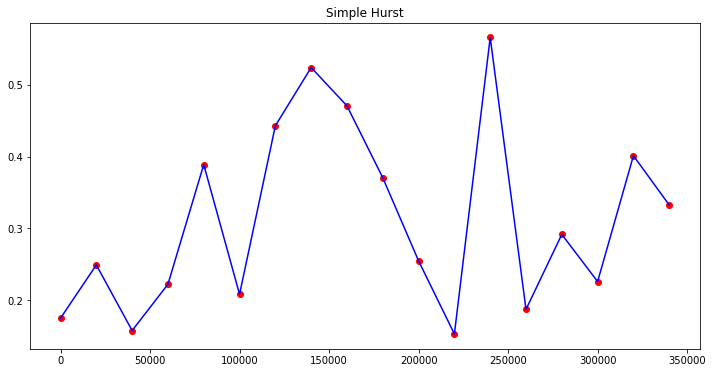

In [13]:
data = input_data.close
data = data.values

frame = 20_000
X = list()
H = list()
for i in range(0, len(data) // frame - 1):
    X.append(i*frame)
    H.append(get_hurst_exponent(data[i*frame:(i+1)*frame], max_lag=frame // 2))

plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.title('Simple Hurst')
plt.grid(alpha=0.1)
plt.step(X,H, 'o', color='red')
plt.step(X,H,'-', color='blue')
plt.show()

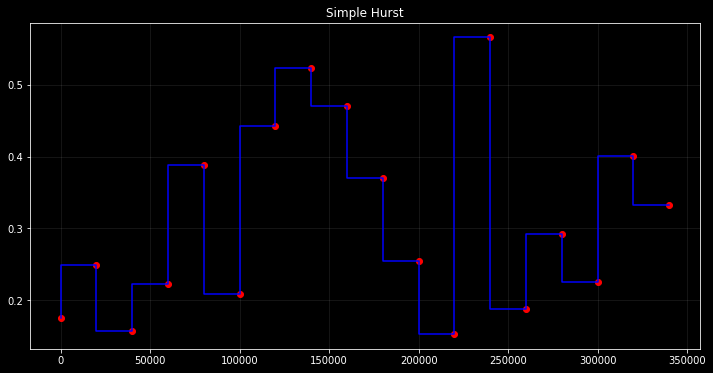

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.title('Simple Hurst')
plt.grid(alpha=0.1)
plt.step(X,H, 'o', color='red')
plt.step(X,H,'-', color='blue')
plt.show()

0.00016045513175213516